# Proppit Analytics
### January 2023

In [17]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Analyze Proppit Data along these set criteria:

Popularity:
- Top Projects by Count of Leads
- Top Projects per Location
- Top Projects by Developer

Pricing and Types of Leads:
- Average Price of Leads
- Lead Status
- Type of Lead

Leads Distribution
- Count of Leads by Type and Price

Timelines
- Leads per Year
- Leads per Year 2022
- Leads per Year 2023
- Leads per Weekday

# 

# Import Packages / Data / Create Backup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Proppit Analytics.csv')

In [370]:
df.sample(4)

,Creation Date,Lead type,Contact name,Phone,Email,Message,Link ThailandProperty,Link DotProperty,Link Trovit,Link Mitula,...,Project name,Operation type,Area,Status,New_Price,date_full,date_year,date_month,date_weekday,zipcodes
526,2022-12-23 14:19:44+00:00,Phone,Sarapron Limsoawakung,+66970518521,sarapron_lim@hotmail.com,NaN,https://www.thailand-property.com/ads/81f265e5...,https://www.dotproperty.co.th/ads/81f265e5-ded...,https://th.trovit.com/baan/listing/ad-title-sl...,https://baan.mitula.in.th/adform/81f265e5-dedd...,...,Niche Mono Ramkhamhaeng,Sale,NaN,New,2894975,2022-12-23,2022,NaN,Friday,10240
329,2022-08-19 05:57:58+00:00,Phone,Anna Nonwiwat,858483664,bkkpropertyexpert@gmail.com,NaN,https://www.thailand-property.com/ads/db8a5ed6...,https://www.dotproperty.co.th/ads/db8a5ed6-a7b...,https://th.trovit.com/baan/listing/ad-title-sl...,https://baan.mitula.in.th/adform/db8a5ed6-a7b6...,...,The Reserve Sukhumvit 61,Sale,NaN,New,9240000,2022-08-19,2022,NaN,Friday,10110
368,2022-07-06 21:29:15+00:00,Mail,Dan,+15149992180,thetvrocker@gmail.com,hi i'd like more info. thank you.,https://www.thailand-property.com/ads/817c239f...,https://www.dotproperty.co.th/ads/817c239f-5e8...,https://th.trovit.com/baan/listing/ad-title-sl...,https://baan.mitula.in.th/adform/817c239f-5e88...,...,Life Asoke Hype,Sale,NaN,New,6487311,2022-07-06,2022,NaN,Wednesday,10400
511,2022-04-18 02:20:58+00:00,Phone,Gosin Petnuannoi,+66863166800,gpetnuannoi@gmail.com,NaN,https://www.thailand-property.com/ads/807a860b...,https://www.dotproperty.co.th/ads/807a860b-c75...,https://th.trovit.com/baan/listing/ad-title-sl...,https://baan.mitula.in.th/adform/807a860b-c752...,...,The Matt Sukhumvit 101/1,Sale,NaN,Contacted,3193900,2022-04-18,2022,NaN,Monday,10260


In [5]:
df.columns

Index(['Creation Date', 'Lead type', 'Contact name', 'Phone', 'Email',
       'Message', 'Link ThailandProperty', 'Link DotProperty', 'Link Trovit',
       'Link Mitula', 'Link Nestoria', 'Link Hipflat', 'Reference number',
       'Agency email', 'Title', 'Property type', 'Price', 'City', 'Bedrooms',
       'Project name', 'Operation type', 'Area', 'Status'],
      dtype='object')

In [97]:
orig_df = df.copy()

In [465]:
df = orig_df.copy()

# 

# Data Wrangling and Formating

In [467]:
df['Creation Date']

0      2022-09-27T07:21:07Z
1      2022-08-18T05:19:52Z
2      2022-07-23T11:41:53Z
3      2022-08-20T07:30:11Z
4      2022-10-28T03:51:26Z
               ...         
564    2023-01-21T18:00:06Z
565    2022-07-20T02:24:50Z
566    2022-12-23T09:37:47Z
567    2022-06-19T09:04:55Z
568    2022-12-16T18:45:11Z
Name: Creation Date, Length: 569, dtype: object

In [468]:
# Change timestamp column from datatype of object to timestamp
df['Creation Date'] = pd.to_datetime(df['Creation Date']) 

In [469]:
df['Creation Date']

0     2022-09-27 07:21:07+00:00
1     2022-08-18 05:19:52+00:00
2     2022-07-23 11:41:53+00:00
3     2022-08-20 07:30:11+00:00
4     2022-10-28 03:51:26+00:00
                 ...           
564   2023-01-21 18:00:06+00:00
565   2022-07-20 02:24:50+00:00
566   2022-12-23 09:37:47+00:00
567   2022-06-19 09:04:55+00:00
568   2022-12-16 18:45:11+00:00
Name: Creation Date, Length: 569, dtype: datetime64[ns, UTC]

In [470]:
df['date_full'] = df['Creation Date'].dt.date
df['date_year'] = df['Creation Date'].dt.year
df['date_month'] = df['Creation Date'].dt.month
df['date_weekday'] = df['Creation Date'].dt.strftime('%A')

In [471]:
import calendar
df['date_month'] = df['date_month'].apply(lambda x: calendar.month_abbr[x])

In [472]:
df['date_month'].unique()

array(['Sep', 'Aug', 'Jul', 'Oct', 'Mar', 'Jun', 'Jan', 'Dec', 'Nov',
       'May', 'Feb', 'Apr'], dtype=object)

In [473]:
# convert date month into ordered categorical types
ordinal_var_dict = {
    'date_month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
     'date_weekday': ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']              
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [474]:
df['date_weekday'].value_counts()

Monday       129
Friday        81
Wednesday     81
Tuesday       79
Saturday      76
Thursday      66
Sunday        57
Name: date_weekday, dtype: int64

In [477]:
df['New_Price'] = df['Price'].apply(lambda x : x[:-1]).astype(int)

In [478]:
def get_zipcode(x):
    return " ".join(re.findall(r'\d\d\d\d\d', x))

In [479]:
df['zipcodes'] =  df['City'].apply(get_zipcode)

In [480]:
#df['City'].apply(lambda x : ''.join(re.findall(r'\d\d\d\d\d', x) ))

In [481]:
zipcode_df = pd.read_csv("zipcodelist.csv")

In [482]:
zipcode_df.sample(4)

,Country code,Post code,District,State,district2,district3
356,TH,48140,Na Thom,Nakhon Phanom,NaN,NaN
349,TH,48000,Muang Nakhon Phanom,Nakhon Phanom,NaN,NaN
515,TH,63000,Muang Tak,Tak,NaN,NaN
173,TH,34280,Na Chaluai,Ubon Ratchathani,NaN,NaN


In [483]:
zipcode_df['Post code'] = zipcode_df['Post code'].astype(str)

In [484]:
df = pd.merge(df, zipcode_df, how='left', left_on = 'zipcodes', right_on = 'Post code')

#### 

#### 

# Data Analysis

# Popularity:
- Top Projects by Count of Leads
- Top Projects by Location
- Top Projects by Developer

Top Projects by Count of Leads

In [475]:
df.groupby('Project name').count()['Creation Date'].sort_values(ascending=False)[:11].reset_index()

,Project name,Creation Date
0,NUE District R9,120
1,Noble BE19,19
2,Edge Central Pattaya,17
3,Life Asoke Hype,16
4,Aeras,15
5,Maestro 14 Siam - Ratchathewi,11
6,คอนโด มาเอสโตร 19 รัชดา19-วิภา,11
7,Quintara Treehaus Sukhumvit 42,10
8,โนเบิล อราวน์ เทอร์ตี้ทรี,9
9,แกรนด์ โซแลร์ พัทยา,9


#### 

In [485]:
states = df.groupby('State').count()['Creation Date'].sort_values(ascending=False).reset_index()
states.set_axis(['State', 'Count'], axis='columns', inplace=True)

Top Projects by Location

In [486]:
states

,State,Count
0,Bangkok,588
1,Chonburi,53
2,Pathum Thani,15
3,Phuket,8
4,Samut Prakan,6
5,Nonthaburi,5
6,Prachuap Khirikhan,1


In [412]:
#df.groupby('place').count()['Creation Date'].sort_values(ascending=False).reset_index()

Top Districts in Bangkok

In [488]:
df[df['State'] == 'Bangkok'].groupby('District').count()['Creation Date'].sort_values(ascending=False)[:11].reset_index()

,District,Creation Date
0,Wangthong Lang,137
1,Wattana,114
2,Ding Daeng,52
3,Phaya Thai,52
4,Bang Na,23
5,Phra Khanong,23
6,Bang Kapi,21
7,Bung Kum,21
8,Saphan Sung B39,21
9,Bang Su,14


Top Districts in Chonburi

In [563]:
df[df['State'] == 'Chonburi'].groupby('District').count()['Creation Date'].sort_values(ascending=False)[:11].reset_index()

,District,Creation Date
0,Bang Lamung,52
1,Muang Chonburi,1


Top Districts in Pathum Thani

In [493]:
df[df['State'] == 'Pathum Thani'].groupby('District').count()['Creation Date'].sort_values(ascending=False)[:11].reset_index()

,District,Creation Date
0,Khlong Luang,15


Top Districts in Phuket

In [494]:
df[df['State'] == 'Phuket'].groupby('District').count()['Creation Date'].sort_values(ascending=False)[:11].reset_index()

,District,Creation Date
0,Thalang,7
1,Kathu,1


# 

In [489]:
#df.groupby(['State','District']).count()['Creation Date']#.reset_index()

State               District          
Bangkok             Bang Kapi              21
                    Bang Khae               9
                    Bang Khen               9
                    Bang Kholame            5
                    Bang Na                23
                    Bang Plat               7
                    Bang Rak                6
                    Bang Su                14
                    Bangkok Noi             7
                    Bangkok Yai             5
                    Bung Kum               21
                    Ding Daeng             52
                    Khanna Yao              7
                    Khlong San              5
                    Lat Phrao               7
                    Nong Khaem              9
                    Pahtum Wan              6
                    Phasi Charoen           9
                    Phaya Thai             52
                    Phra Khanong           23
                    Sai Mai              

# 

In [497]:
orig_df2 = df.copy()

In [542]:
df = orig_df2.copy()

In [543]:
developers = pd.read_csv('Developerlist.csv')

In [544]:
developers.head()

,Developer,Project,Type
0,Origin,The Origin Sukhumvit 105,Condo
1,AP (Thai),The Address Siam - Ratchatewi,Condo
2,Origin,The Origin Ramintra 83 Station,Condo
3,Ananda,Unio Town Suksawat 30,Townhouse
4,Ananda,Artale Ekkamai - Ramintra,Townhouse


In [545]:
#df['Project name'] = 
df['Project name'].astype(str)

0                                     NUE District R9
1                                     NUE District R9
2                                     NUE District R9
3                                           M Jatujak
4                     แชมเบอร์ส เฌอ รัชดา – รามอินทรา
                            ...                      
737                                   NUE District R9
738    Origin Plug & Play Ramkhamhaeng Triple Station
739    Origin Plug & Play Ramkhamhaeng Triple Station
740    Origin Plug & Play Ramkhamhaeng Triple Station
741                                   NUE District R9
Name: Project name, Length: 742, dtype: object

In [546]:
#developers['Developer'] = 
developers['Developer'].astype(str)

0               Origin
1            AP (Thai)
2               Origin
3               Ananda
4               Ananda
             ...      
1690    Ruamchaiteedin
1691             Noble
1692             Noble
1693         AP (Thai)
1694           Sansiri
Name: Developer, Length: 1695, dtype: object

In [547]:
df = pd.merge(df, developers, how='left', left_on = 'Project name', right_on = 'Project')

Top Projects by Developer

In [548]:
df['Developer'].value_counts()[:11].reset_index()

,index,Developer
0,AP (Thai),41
1,Major,34
2,Risland,26
3,ASSETWISE,25
4,Sansiri,24
5,Origin,23
6,Noble,22
7,Ananda,20
8,The Urban Property,19
9,Land and Houses,16


In [549]:
df.groupby(['Developer','Project name']).count()['Creation Date']

Developer           Project name         
AP (Thai)           Life Asoke Hype          32
                    Life Ladprao Valley       1
                    Life Rama 4 - Asoke       5
                    Life Sathorn Sierra       3
ASSETWISE           Atmoz Chaengwattana       2
                                             ..
TTC Capital Land    The Empire Place          4
The Nest Property   The Nest Sukhumvit 71     1
The Urban Property  Aeras                    15
                    Attitude BU               2
                    Attitude Lasalle          2
Name: Creation Date, Length: 71, dtype: int64

### Developer by Developer Breakdown

AP (Thai) 

In [551]:
df[df['Developer']=='AP (Thai)'].groupby(['Developer','Project name']).count()['Creation Date'].sort_values(ascending=False).reset_index()

,Developer,Project name,Creation Date
0,AP (Thai),Life Asoke Hype,32
1,AP (Thai),Life Rama 4 - Asoke,5
2,AP (Thai),Life Sathorn Sierra,3
3,AP (Thai),Life Ladprao Valley,1


Major

In [552]:
df[df['Developer']=='Major'].groupby(['Developer','Project name']).count()['Creation Date'].sort_values(ascending=False).reset_index()

,Developer,Project name,Creation Date
0,Major,Maestro 14 Siam - Ratchathewi,22
1,Major,M Jatujak,8
2,Major,Maru Ladprao 15,4


Risland

In [553]:
df[df['Developer']=='Risland'].groupby(['Developer','Project name']).count()['Creation Date'].sort_values(ascending=False).reset_index()

,Developer,Project name,Creation Date
0,Risland,Skyrise Avenue Sukhumvit 64,14
1,Risland,The LIVIN Phetkasem,12


Assetwise

In [554]:
df[df['Developer']=='ASSETWISE'].groupby(['Developer','Project name']).count()['Creation Date'].sort_values(ascending=False).reset_index()

,Developer,Project name,Creation Date
0,ASSETWISE,Atmoz Ladprao 71,10
1,ASSETWISE,Kave Town Space,7
2,ASSETWISE,Kave Town Shift,6
3,ASSETWISE,Atmoz Chaengwattana,2


Sansiri

In [555]:
df[df['Developer']=='Sansiri'].groupby(['Developer','Project name']).count()['Creation Date'].sort_values(ascending=False).reset_index()

,Developer,Project name,Creation Date
0,Sansiri,Edge Central Pattaya,17
1,Sansiri,Saransiri Srivaree,3
2,Sansiri,XT Phayathai,2
3,Sansiri,The Base Saphanmai,2


Origin

In [556]:
df[df['Developer']=='Origin'].groupby(['Developer','Project name']).count()['Creation Date'].sort_values(ascending=False).reset_index()

,Developer,Project name,Creation Date
0,Origin,Origin Plug & Play Ramkhamhaeng Triple Station,18
1,Origin,The Origin Sukhumvit 105,4
2,Origin,KnightsBridge Space Ratchayothin,1


Noble

In [557]:
df[df['Developer']=='Noble'].groupby(['Developer','Project name']).count()['Creation Date'].sort_values(ascending=False).reset_index()

,Developer,Project name,Creation Date
0,Noble,Noble BE19,19
1,Noble,Nue Noble Chaengwattana,3


The Urban Property

In [559]:
df[df['Developer']=='The Urban Property'].groupby(['Developer','Project name']).count()['Creation Date'].sort_values(ascending=False).reset_index()

,Developer,Project name,Creation Date
0,The Urban Property,Aeras,15
1,The Urban Property,Attitude Lasalle,2
2,The Urban Property,Attitude BU,2


Ananda

In [560]:
df[df['Developer']=='Ananda'].groupby(['Developer','Project name']).count()['Creation Date'].sort_values(ascending=False).reset_index()

,Developer,Project name,Creation Date
0,Ananda,COCO Parc,8
1,Ananda,Ideo Mobi Bangsue Grand Interchange,5
2,Ananda,Ideo Rama 9 - Asoke,3
3,Ananda,Ideo Q Victory,2
4,Ananda,Ideo Mobi Asoke,1
5,Ananda,Ashton Residence 41,1


Land and Houses

In [561]:
df[df['Developer']=='Land and Houses'].groupby(['Developer','Project name']).count()['Creation Date'].sort_values(ascending=False).reset_index()

,Developer,Project name,Creation Date
0,Land and Houses,The Key MRT Phetkasem 48,12
1,Land and Houses,The Bangkok Thonglor,4


Sena

In [562]:
df[df['Developer']=='SENA'].groupby(['Developer','Project name']).count()['Creation Date'].sort_values(ascending=False).reset_index()

,Developer,Project name,Creation Date
0,SENA,Niche Mono Charoen Nakorn,9
1,SENA,Niche Mono Ramkhamhaeng,3


# 

# Pricing and Types of Leads:
- Average Price of Leads
- Lead Status
- Type of Lead

Average Price of Leads

In [476]:
round((df['Price'].apply(lambda x : x[:-1])).astype(int).mean(),2)

8137603.86

Lead Status

In [595]:
df['Status'].value_counts().reset_index()

,index,Status
0,New,655
1,Contacted,74
2,Lost,13


Type of Lead

In [594]:
df['Operation type'].value_counts().reset_index()

,index,Operation type
0,Sale,721
1,Rent,21


Leads Distribution
- Count of Leads by Type
- Price of Leads by Developer
- Most number of searches (by Email count)
- Contact Channels

Count of Leads by Type

In [66]:
df['Property type'].value_counts().reset_index()

,index,Property type
0,Condo,529
1,Villa,18
2,Apartment,8
3,House,6
4,Hotel,4
5,Townhouse,4


Price of Leads by Type

In [136]:
df.groupby('Property type').mean()['New_Price'].astype(int).reset_index()

,Property type,New_Price
0,Apartment,932375
1,Condo,7892168
2,Hotel,12794550
3,House,7762000
4,Townhouse,5031400
5,Villa,18333583


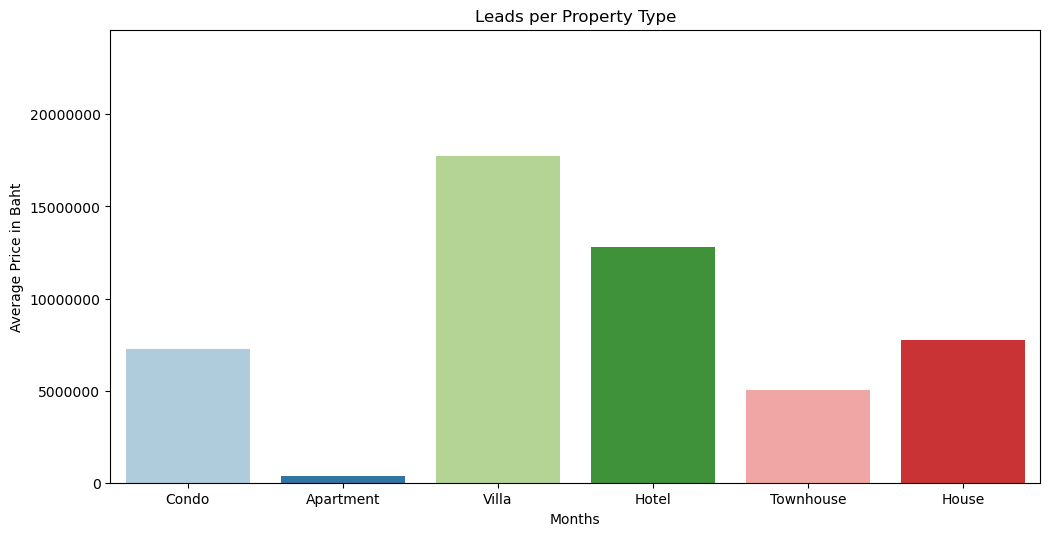

In [567]:
plt.figure(dpi=100,figsize=(12,6))
# errwidth removes variance lines in each bar
sns.barplot(data=df,x='Property type',y='New_Price',palette='Paired',alpha=1,errwidth=0)
plt.ticklabel_format(style='plain', axis='y');
#ax.bar_label(ax.containers[0])
plt.xlabel("Months")
plt.ylabel("Average Price in Baht")
plt.title("Leads per Property Type")
plt.show;

Most number of searches (by Email count)

In [591]:
df['Email'].value_counts()[:11].reset_index()

,index,Email
0,tanguy.thomas@gmail.com,30
1,paulcy0620@gmail.com,13
2,petersax@gmail.com,12
3,lawrencethet@gmail.com,9
4,bakethar1992@gmail.com,8
5,pachsiry@hotmail.com,8
6,realtime2l6289@gmail.com,7
7,tamratnangul@gmail.com,7
8,naridsara.mu@propretyscout.ac.th,6
9,m.chuaymueang@gmail.com,6


Contact Channels

In [585]:
plt.rcParams["figure.dpi"] = 140

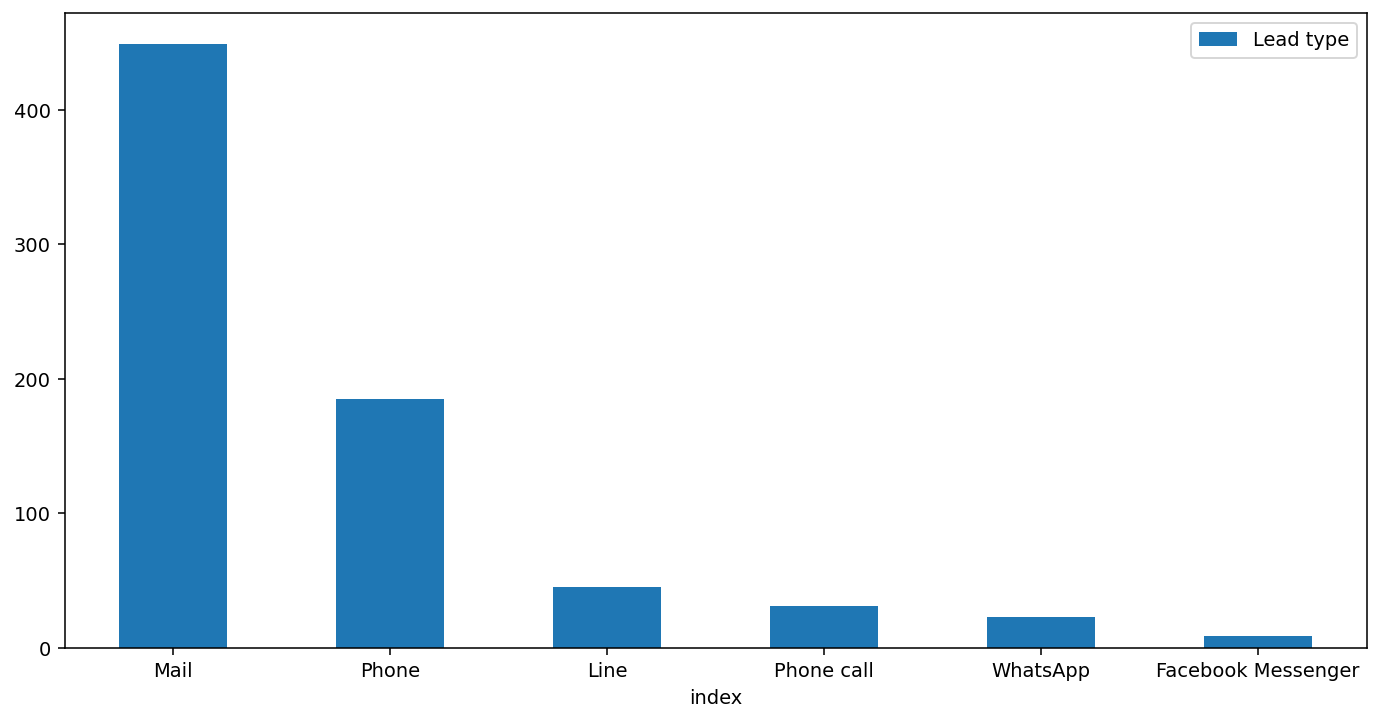

In [586]:
df['Lead type'].value_counts().reset_index().plot(x='index',kind='bar',rot=0,figsize=(12,6))
plt.show;

# 

# Timelines
- Leads per Year
- Leads per Year 2022
- Leads per Year 2023
- Leads per Weekday

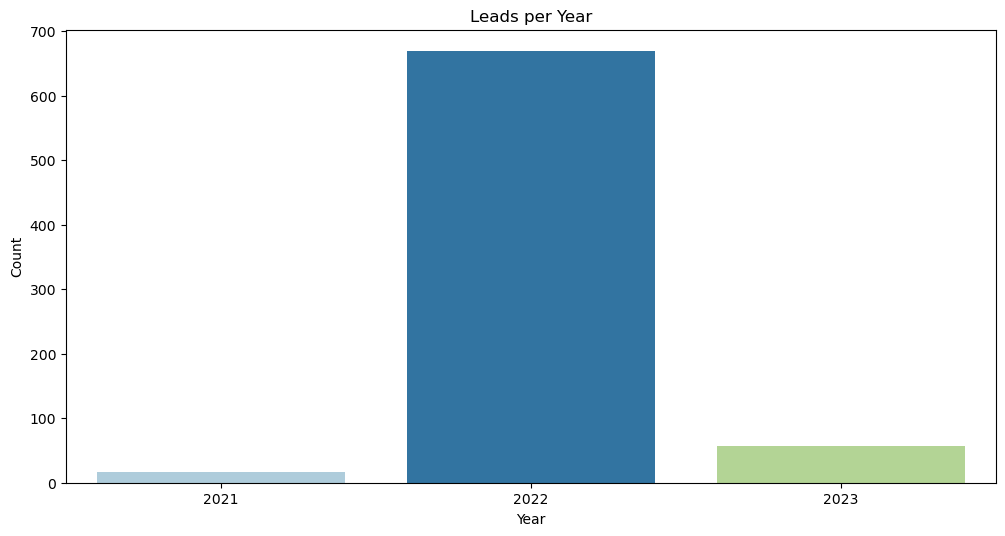

In [570]:
plt.figure(dpi=100,figsize=(12,6))
sns.countplot(data=df,x='date_year',palette='Paired')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Leads per Year")
plt.show;

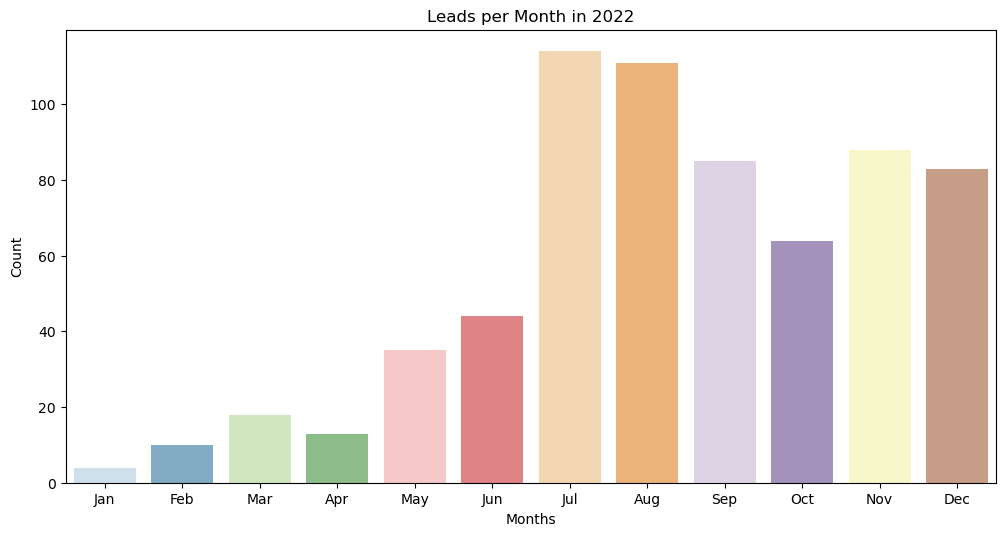

In [569]:
plt.figure(dpi=100,figsize=(12,6))
sns.countplot(data=df[df['date_year']==2022],x='date_month',palette='Paired',alpha=0.6)
#sns.lineplot(data=df[df['date_year']==2022].groupby('date_month').count()['Creation Date'],markers=True)

plt.xlabel("Months")
plt.ylabel("Count")
plt.title("Leads per Month in 2022")
plt.show;

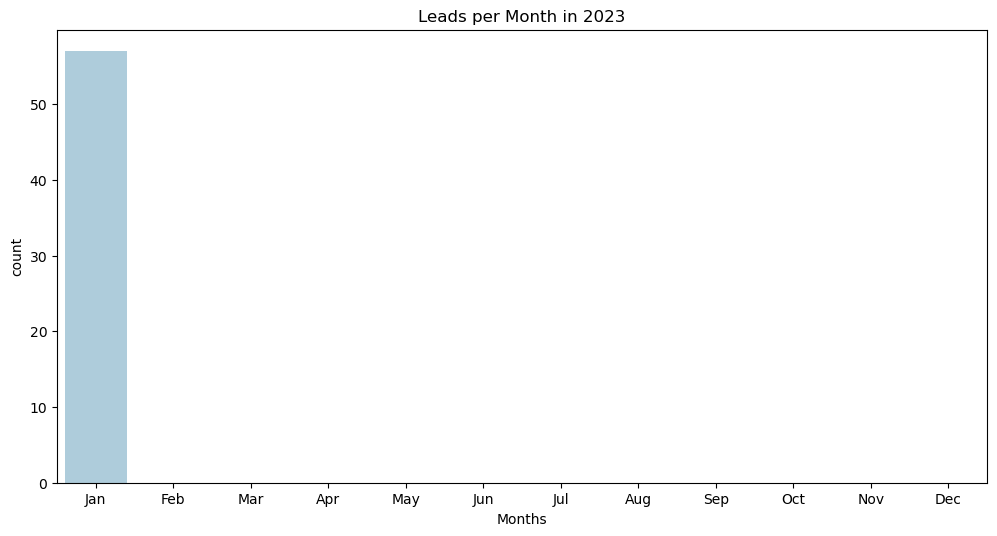

In [571]:
plt.figure(dpi=100,figsize=(12,6))
sns.countplot(data=df[df['date_year']==2023],x='date_month',palette='Paired')
plt.xlabel("Months")
#plt.ylabel("Values")
plt.title("Leads per Month in 2023")
plt.show;

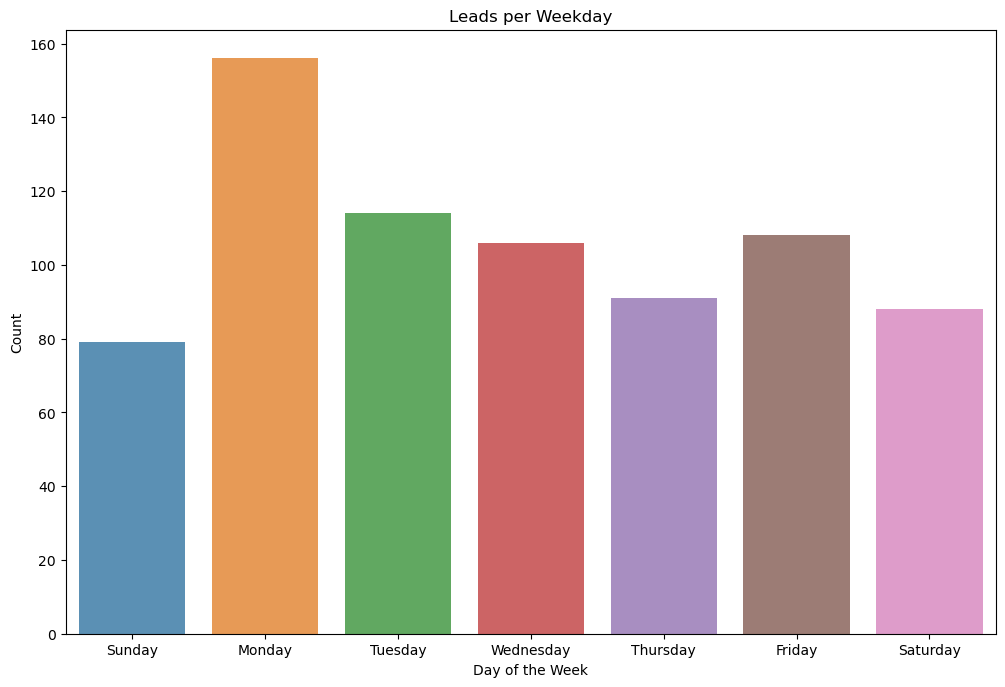

In [574]:
plt.figure(dpi=100,figsize=(12,8))
sns.countplot(data=df,x='date_weekday',alpha=0.8)
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.title("Leads per Weekday")
plt.show;

# END

In [29]:
!jupyter nbconvert Proppit_Analytics_Slide.ipynb --to slides --no-input --no-prompt --post serve

[NbConvertApp] Converting notebook Proppit_Analytics_Slide.ipynb to slides
[NbConvertApp] Writing 735677 bytes to Proppit_Analytics_Slide.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\User\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\User\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\User\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\User\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  F

In [19]:
!jupyter nbconvert --to slides --TemplateExporter.exclude_input=True Proppit.ipynb

[NbConvertApp] Converting notebook Proppit.ipynb to slides
[NbConvertApp] Writing 740658 bytes to Proppit.slides.html


In [ ]:
#!jupyter nbconvert Proppit.ipynb --to slides --no-input --no-prompt --post serve --reveal-prefix "http://cdn.jsdelivr.net/reveal.js/2.5.0"

In [22]:
!jupyter nbconvert Proppit.ipynb --to slides --no-input --no-prompt --reveal-prefix "http://cdn.jsdelivr.net/reveal.js/2.5.0"

[NbConvertApp] Converting notebook Proppit.ipynb to slides
[NbConvertApp] Writing 736356 bytes to Proppit.slides.html
